In [1]:
# pip install findspark

In [2]:
import seaborn as sns
print('sns',sns.__version__)

sns 0.10.0


In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession

In [14]:
import matplotlib.pyplot as plt
import pandas

In [5]:
spark = SparkSession.builder.appName("Demo example of plot").getOrCreate()
sc = spark.sparkContext

Reading the football_data.json file and creating a new temporary view using a SparkDataFrame

In [6]:
df = spark.read.json(r"F:\Twitter\account_and_user\tweets\football_data.json")
df.createOrReplaceTempView("tweet_table")

In [74]:
query1 = spark.sql("select place.country,count(*) As Count from tweet_table where place.country is not null GROUP BY place.country ORDER BY count "
                  "DESC limit 10")

In [75]:
pd_query1 = query1.toPandas()

In [78]:
pd_query1

,country,Count
0,United States,3056
1,United Kingdom,974
2,Brasil,643
3,México,476
4,Nigeria,283
5,España,267
6,Argentina,263
7,Colombia,154
8,France,144
9,South Africa,140


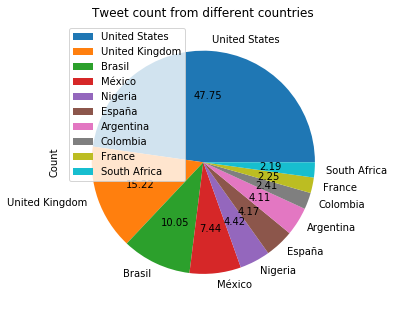

In [76]:
pd_query1.plot.pie(y='Count',labels=pd_query1.country.values.tolist(),figsize=(5,10),autopct='%.2f',title="Tweet count from different countries")

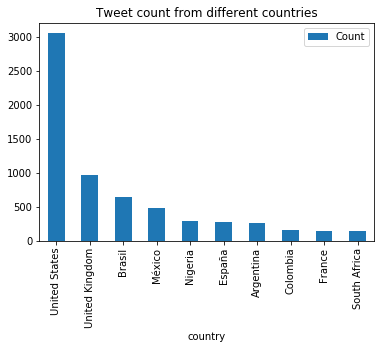

In [14]:
pd_query1.plot.bar(x="country",y="Count",title="Tweet count from different countries")

In [60]:
query2 = spark.sql("select user.name,retweeted_status.text as Retweet_Text,retweeted_status.retweet_count as Retweet_Count from tweet_table where retweeted_status.retweet_count is not null order by retweeted_status.retweet_count desc limit 10")

In [61]:
pd_query2 = query2.toPandas()

In [79]:
pd_query2

,name,Retweet_Text,Retweet_Count
0,ash,Our story. Our awards. Our songs. Our albums. ...,245540
1,Nat Nat🖤,So a month ago I dropped a ring &amp; a clip d...,222756
2,Summer,So a month ago I dropped a ring &amp; a clip d...,222754
3,Lucas Ferkol,If golf and soccer switched announcers... http...,219128
4,💜REBECA becky💜,[#오늘의방탄] 아미와 방탄.. 방탄과 아미... 우리 존재 자체가 사랑..💜 20...,183615
5,May 22nd,This son bought his dad a truck after his dad’...,173951
6,Adelaide,Brit Awards. Thank you to everyone who voted. ...,147956
7,Andrea loves Z,This kid is so cool. May Allah bless him. Dinn...,136926
8,Ruben,Si Mbappé ficha por el Real Madrid este verano...,134065
9,💜BTSpopie⁷💜,thank you 💕 https://t.co/ESmo67cUek,108975


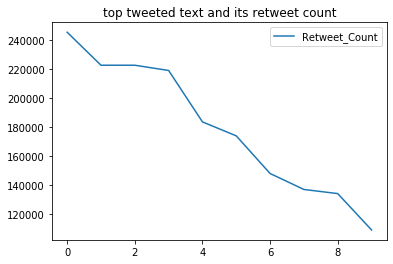

In [73]:
# pd_query2.plot.bar(x="name",y="Retweet_Count",title="User with more tweets for his tweets")
pd_query2.plot(title="top tweeted text and its retweet count")

In [52]:
query3 = spark.sql("select user.location,count(text) as tweet_count from tweet_table where place.country='United States'and "
                   "user.location is not null Group By user.location ORDER BY tweet_count DESC LIMIT 15")

In [53]:
pd_query3 = query3.toPandas()

In [80]:
pd_query3

,location,tweet_count
0,"Houston, TX",40
1,"Chicago, IL",40
2,"Los Angeles, CA",37
3,"Atlanta, GA",29
4,United States,26
5,"Dallas, TX",24
6,"San Antonio, TX",21
7,"Philadelphia, PA",21
8,"Florida, USA",20
9,"Austin, TX",20


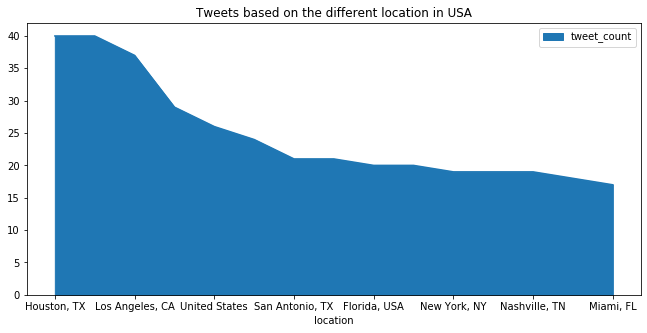

In [58]:
# pd_query3
# pd.country.values.tolist(
pd_query3
pd_query3.plot.area(x = "location",y="tweet_count",title="Tweets based on the different location in USA",figsize=(11,5))
# pd_query3.plot(kind='pie',y ='tweet_count',labels=pd_query3.location.values.tolist())
# pd_query3.plot.pie(y='count',labels=pd_query3.location.values.tolist(),figsize=(5,10))

In [45]:
query4 = spark.sql("select user.screen_name,text,retweeted_status.retweet_count from tweet_table order by retweeted_status.retweet_count DESC limit 20")

In [46]:
pd_query4 = query4.toPandas()

In [81]:
pd_query4

,screen_name,text,retweet_count
0,ashtesolim,RT @justinbieber: Our story. Our awards. Our s...,245540
1,The_Names_Tally,RT @ginaawilsonn: So a month ago I dropped a r...,222756
2,smessercola__,RT @ginaawilsonn: So a month ago I dropped a r...,222754
3,lucas_ferkol,RT @johnbcrist: If golf and soccer switched an...,219128
4,Rbkmj27Becky,RT @bts_bighit: [#오늘의방탄] 아미와 방탄.. 방탄과 아미... 우리...,183615
5,Dee_H3rbo,RT @Charles43631438: This son bought his dad a...,173951
6,Adelaide_RoseX,RT @Harry_Styles: Brit Awards. Thank you to ev...,147956
7,zaddyxgirl,RT @iamsrk: This kid is so cool. May Allah ble...,136926
8,Neburr12,RT @DjMaRiiO_90: Si Mbappé ficha por el Real M...,134065
9,huda_BTS7kings,RT @BTS_twt: thank you 💕 https://t.co/ESmo67cUek,108975


Text(0.5, 1.0, 'Users with more no of retweets for his tweet')

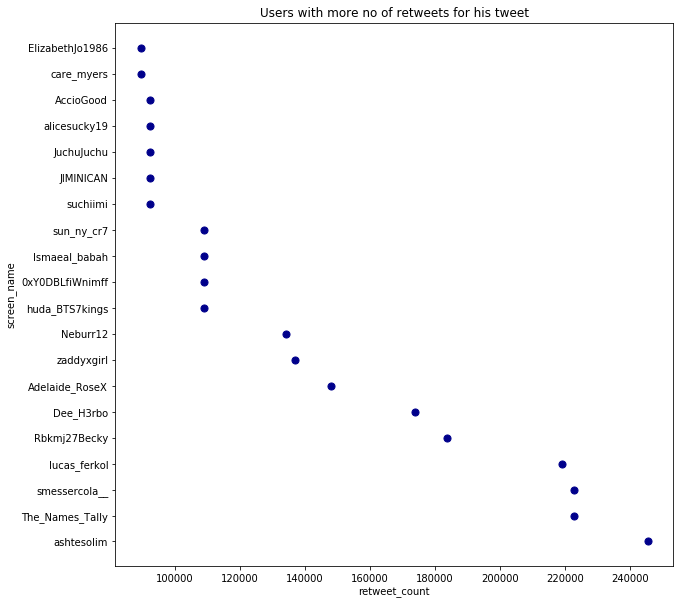

In [51]:
# sns.catplot(x="retweet_count",y="text",data=pd_query4)
# pd_query4.plot.hist(stacked=True, bins=20,alpha=0.5)
# pd_query4.plot.box(pd_query4.screen_name.tolist())
pd_query4.plot.scatter(x="retweet_count",y='screen_name',color='DarkBlue', s=50,figsize=(10,10))
plt.title("Users with more no of retweets for his tweet")
# pd_query4.plot.bar(x="screen_name",y="retweet_count",title="User with more tweets for his tweets")
# radviz(pd_query4,'retweet_count')

In [32]:
query5 = spark.sql("select count(*) as count,q.text from (select case when text like '%fcb%' then 'fc barcelona' when "
                  " text like '%real madrid%' then 'real madrid' when text like '%fifa%' then 'fifa' when text"
                  " like '%la liga%' then 'la liga' when text like '%nfl%' then 'nfl' when text like '%arsenal%' "
                  " then 'arsenal' when text like '%chelsea%' then 'chelsea fc' when text like '%manchester%' "
                  " then 'manchester' when text like '%psg%' then 'psg' when text like '%premier league%' then 'premier league'"
                  " end as text from "
                  " tweet_table)q group by q.text")

In [33]:
pd_query5 = query5.toPandas()

In [82]:
pd_query5

,count,text
0,533598,None
1,289,arsenal
2,213,real madrid
3,4636,nfl
4,499,psg
5,75,chelsea fc
6,2676,la liga
7,17,manchester
8,83,premier league
9,536,fc barcelona


Text(0.5, 1, 'Tweets based on the different league matches')

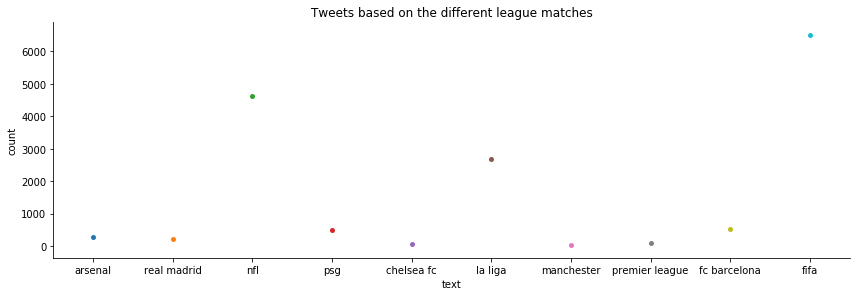

In [44]:
pd_query5
sns.catplot(x="text", y="count",kind="swarm", data=pd_query5.dropna(),height=4,aspect=3)
plt.title("Tweets based on the different league matches")

In [23]:
query6 = spark.sql("select user.screen_name, max(user.followers_count)as followers_count from tweet_table where text "
                  " like '%football%' group by user.screen_name, user.lang order by followers_count desc limit 15")

In [24]:
pd_query6 = query6.toPandas()

In [83]:
pd_query6

,screen_name,followers_count
0,NFL,25264898
1,TheEconomist,24595917
2,ManUtd,21682621
3,guardian,8639812
4,BBCSport,8375940
5,lequipe,5151027
6,Patriots,4603729
7,USATODAY,4061642
8,THR,3223404
9,guardiannews,3138150


Text(0.5, 1, 'User with more no of followers')

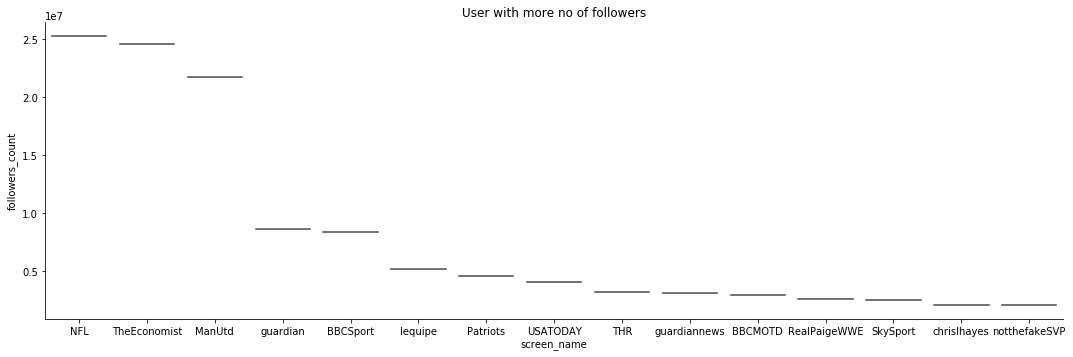

In [37]:
sns.catplot(x="screen_name",y="followers_count", kind="violin",data=pd_query6,height=5,aspect=3)
plt.title("User with more no of followers")

In [16]:
query7 = spark.sql("select count(*) as NumberOfTweets, 'Android' as Source from tweet_table where source like '%Twitter for Android%' UNION select count() as NumberOfTweets, 'IPhone' as Source from tweet_table where source like '%Twitter for iPhone%' UNION select count() as NumberOfTweets, 'IPad' as Source from tweet_table where source like '%Twitter for iPad%' UNION select count() as NumberOfTweets, 'Web' as Source from tweet_table where source like '%Twitter Web App%'")

In [17]:
pd_query7 = query7.toPandas()

In [85]:
pd_query7

,NumberOfTweets,Source
0,0,IPhone
1,220842,Android
2,0,Web
3,0,IPad


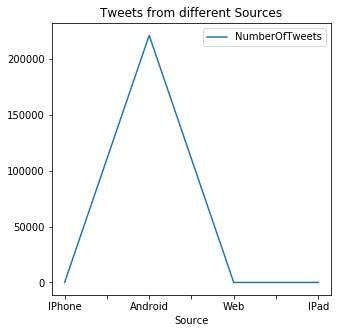

In [22]:
# sns.pairplot(y="NumberOfTweets",x="Source",data=pd_query5)
pd_query7.plot.line(y="NumberOfTweets",x="Source",title="Tweets from different Sources")

In [7]:
day_data = spark.sql("SELECT substring(user.created_at,1,3) as day from tweet_table where text is not null")
day_data.createOrReplaceTempView("day_data")

days_final = spark.sql(
          """ SELECT Case
            when day LIKE '%Mon%' then 'WEEKDAY'
            when day LIKE '%Tue%' then 'WEEKDAY'
            when day LIKE '%Wed%' then 'WEEKDAY'
            when day LIKE '%Thu%' then 'WEEKDAY'
            when day LIKE '%Fri%' then 'WEEKDAY'
            when day LIKE '%Sat%' then 'WEEKEND'
            when day LIKE '%Sun%' then 'WEEKEND'
             else
             null
             end as day1 from day_data where day is not null""")
days_final.createOrReplaceTempView("days_final")
query8 = spark.sql("SELECT day1 as Day,Count(*) as Day_Count from days_final where day1 is not null group by day1 order by count(*) desc")

In [8]:
pd_query8 = query8.toPandas()

In [84]:
pd_query8

,Day,Day_Count
0,WEEKDAY,398728
1,WEEKEND,150403


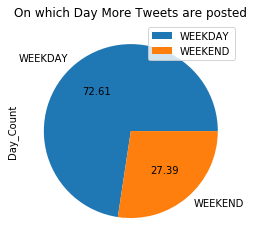

In [9]:
pd_query8.plot.pie(y="Day_Count",labels=pd_query8.Day.tolist(),autopct='%.2f',title="On which Day More Tweets are posted")

In [11]:
query9 = spark.sql("select count(*) as count,lang from tweet_table where text like '%la liga%' group by lang order by count desc")

In [12]:
pd_query9 = query9.toPandas()

In [86]:
pd_query9

,count,lang
0,2653,es
1,58,en
2,19,ca
3,13,pt
4,6,fr
5,2,ro
6,1,und
7,1,tl
8,1,in
9,1,tr


Text(0.5, 1, 'Tweet count based on language')

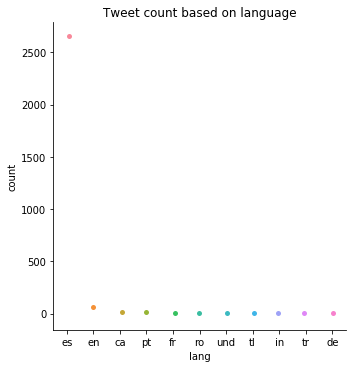

In [15]:
# sns.lineplot( x ="country",y="Count", data=pd)
sns.catplot(x ="lang",y="count",data=pd_query9)
plt.title("Tweet count based on language")
# pd_query10
# sns.catplot(x ="hour",y="tweets_count", kind="violin",style = "smoker" ,split=True,data=pd_query9)

In [19]:
timehour = spark.sql("SELECT SUBSTRING(created_at,12,2) as hour from tweet_table where text is not null")

timehour.createOrReplaceTempView("timehour")
timeAnalysis=spark.sql("SELECT Case when hour>=0 and hour <4 then 'midnight' when hour>=4 and hour <7 then 'earlymorning' "
            " when hour>=7 and hour <12 then 'Day-time' when hour>=12 and hour <15 then 'afternoon' when hour>=15 and "
            " hour <18 then 'evening' when hour>=18 and hour <=23 then 'Night-time' end as time from timehour")

timeAnalysis.createOrReplaceTempView("timeAnalysis")
query10 = spark.sql("SELECT time as hour,Count(*) as tweets_count from timeAnalysis where time is not null group by time order by count(*) desc")

In [20]:
pd_query10 = query10.toPandas()

In [87]:
pd_query10

,hour,tweets_count
0,evening,244177
1,Night-time,234567
2,midnight,51924
3,afternoon,18463


Text(0.5, 1, 'Tweet count on hourly bases')

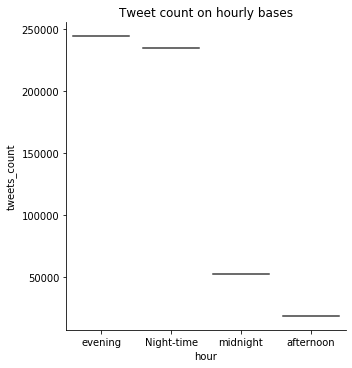

In [21]:
# sns.lineplot( x ="country",y="Count", data=pd)
# sns.relplot(x ="hour",y="tweets_count", data=pd_query10)
# pd_query10
sns.catplot(x ="hour",y="tweets_count", kind="violin",style = "smoker" ,split=True,data=pd_query10)
plt.title("Tweet count on hourly bases")